# #Logistic Regression

 #Let’s make the Logistic Regression model, predicting whether a user will
 #purchase the product or not.

 #Imputing Libraries

#matplotlib. pyplot is a collection of functions that make matplotlib work like MATLAB
#pandas library use for manipulation and analysis of data
#numpy consit 0f multidimesional array objects

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading dataset – User_Data

In [8]:
dataset = pd.read_csv("User_Data.csv")

Now, to predict whether a user will purchase the product or not,
#one needs to find out the relationship between Age and Estimated Salary.
#Here User ID and Gender are not important factors for finding out this.

# input

In [9]:
x = dataset.iloc[:, [2, 3]].values

only take column 2 and 3 as input

# output

In [ ]:
y = dataset.iloc[:, 4].values

only take column 4 as output

In [ ]:
dataset.shape


(400, 5)

sae explain the size of rows and columns 

In [ ]:
dataset.head(100)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
95,15709441,Female,35,44000,0
96,15710257,Female,35,25000,0
97,15582492,Male,28,123000,1
98,15575694,Male,35,73000,0


only take first 100 values

# spliting

now we split the data into two parts for training and testing 75% for training nad 25% for testing 

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state =0)

#Now, it is very important to perform feature scaling here
#because Age and Estimated Salary values lie in different ranges.
#If we don’t scale the features
#then Estimated Salary feature will dominate Age feature
#when the model finds the nearest neighbor to a data point in data space.
#Here once see that Age and Estimated salary features values are sacled 39.# and now there in the -1 to 1.
#Hence, each feature will contribute equally in decision making
#i.e. finalizing the hypothesis.

# scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

print (xtrain[0 : 100, :])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

Finally, we are training our Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

After training the model, it time to use it to do prediction on testing data

In [ ]:
y_pred = classifier.predict(xtest)

# performance testing and accuracy

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)

from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Confusion Matrix : 
 [[65  3]
 [ 8 24]]
Accuracy :  0.89


# visualizing the performance of model

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


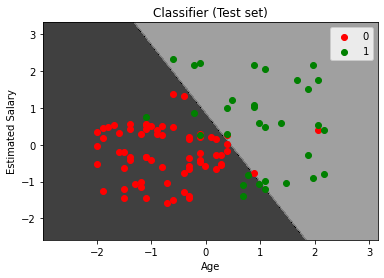

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                               stop = X_set[:, 0].max() + 1,step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                               stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(
              np.array([X1.ravel(),
              X2.ravel()]).T).
             reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black', 'grey')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()